In [ ]:
# function to use requests.post to make an API call to the subgraph url

In [ ]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
! pip install missingno
import missingno as msno
import math
from os import path

# plotly imports
! pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

! pip install wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# folium imports
! pip install folium
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

#importing models for preprocessing and splitting data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#importing packages for classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor

import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from IPython.display import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
import time
import json

In [ ]:
endpoint = "https://gateway.thegraph.com/api/1bc7e47ed96db80fadb98a2c9abbc321/subgraphs/id/6tGbL7WBx287EZwGUvvcQdL6m67JGMJrma3JSTtt5SV7"

def run_query(query, endpoint):

  # endpoint where you are making the request
  request = requests.post(endpoint, json={"query": query})
  if request.status_code == 200:
      return request.json()
  else:
      raise Exception("Query failed. return code is {}.      {}".format(request.status_code, query))

In [ ]:
query = """
query MyQuery {
  account(id: "0xb3325eae761eadcc052daf3d67caad75c6c9e0b4", subgraphError: allow) {
    id
    liquidateCount
    liquidationCount
    positionCount
    openPositionCount
    closedPositionCount
    borrowCount
    repayCount
    withdrawCount
    withdraws(where: {amountUSD_not: "0"}) {
      amount
      amountUSD
      market {
        _borrowBalance
        _reserveFactor
        borrowingPositionCount
        canBorrowFrom
        canUseAsCollateral
        borrows {
          amount
          amountUSD
        }
        cumulativeBorrowUSD
        cumulativeDepositUSD
        cumulativeLiquidateUSD
        cumulativeProtocolSideRevenueUSD
        cumulativeSupplySideRevenueUSD
        cumulativeTotalRevenueUSD
        createdTimestamp
      }
    }
    depositCount
    deposits {
      amount
    }
  }
}
"""

address ="0x839B878873998F02cE2f5c6D78d1B0842e58F192".lower()
print(address)

0x839b878873998f02ce2f5c6d78d1b0842e58f192


In [ ]:
json_data = run_query(query, endpoint)
json_data 

{'data': {'account': {'id': '0xb3325eae761eadcc052daf3d67caad75c6c9e0b4',
   'liquidateCount': 0,
   'liquidationCount': 0,
   'positionCount': 3,
   'openPositionCount': 2,
   'closedPositionCount': 1,
   'borrowCount': 14,
   'repayCount': 2,
   'withdrawCount': 35,
   'withdraws': [{'amount': '1627412456552539',
     'amountUSD': '2.627154839325327054344042',
     'market': {'_borrowBalance': '14864209463879565633782',
      '_reserveFactor': '0.2',
      'borrowingPositionCount': 9836,
      'canBorrowFrom': True,
      'canUseAsCollateral': True,
      'borrows': [{'amount': '100000000000000000',
        'amountUSD': '26.7350000000000036292'},
       {'amount': '100000000000000000', 'amountUSD': '169.967'},
       {'amount': '100000000000000', 'amountUSD': '0.298259'},
       {'amount': '1000000000000000000',
        'amountUSD': '203.030000000000036454'},
       {'amount': '431080000000000000', 'amountUSD': '1000.0042962'},
       {'amount': '520000000000000000', 'amountUSD': '70

In [ ]:
full_data = json_data["data"]
full_data

{'account': {'id': '0xb3325eae761eadcc052daf3d67caad75c6c9e0b4',
  'liquidateCount': 0,
  'liquidationCount': 0,
  'positionCount': 3,
  'openPositionCount': 2,
  'closedPositionCount': 1,
  'borrowCount': 14,
  'repayCount': 2,
  'withdrawCount': 35,
  'withdraws': [{'amount': '1627412456552539',
    'amountUSD': '2.627154839325327054344042',
    'market': {'_borrowBalance': '14864209463879565633782',
     '_reserveFactor': '0.2',
     'borrowingPositionCount': 9836,
     'canBorrowFrom': True,
     'canUseAsCollateral': True,
     'borrows': [{'amount': '100000000000000000',
       'amountUSD': '26.7350000000000036292'},
      {'amount': '100000000000000000', 'amountUSD': '169.967'},
      {'amount': '100000000000000', 'amountUSD': '0.298259'},
      {'amount': '1000000000000000000', 'amountUSD': '203.030000000000036454'},
      {'amount': '431080000000000000', 'amountUSD': '1000.0042962'},
      {'amount': '520000000000000000', 'amountUSD': '700.5596'},
      {'amount': '30000000000

In [ ]:
dataset = {"cumulativeB" : [], "cumulativeD": [], "BorrowedAmount" : [], "USD": [], "collateral": [], "Amount": [], "eligible" : []}


import pandas as pd

full_data = json_data["data"]
full_data
for withdraws in full_data["account"]["withdraws"]:

  Amount = int(withdraws["amount"])
  USDAmount = int(float(withdraws["amountUSD"]))
  borrow = int(withdraws["market"]["_borrowBalance"])
  _eligible = withdraws["market"]["canBorrowFrom"]
  _cumulativeB = withdraws["market"]["cumulativeBorrowUSD"]
  _cumulativeD = withdraws["market"]["cumulativeDepositUSD"]

for depo in full_data["account"]["deposits"]:

  _collateral = depo["amount"]

  dataset["USD"].append(USDAmount)
  dataset["Amount"].append(Amount)
  dataset["eligible"].append(_eligible)
  dataset["cumulativeB"].append(_cumulativeB)
  dataset["cumulativeD"].append(_cumulativeD)
  dataset["BorrowedAmount"].append(borrow)
  dataset["collateral"].append(_collateral)


  dict_df = pd.DataFrame({ key:pd.Series(value) for key, value in dataset.items() })



  # df = pd.DataFrame.from_dict(dataset, orient='index')
  # df.head()

In [ ]:
dict_df

,cumulativeB,cumulativeD,BorrowedAmount,USD,collateral,Amount,eligible
0,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,19599621944392388904,3216168545583757,True
1,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,51140319246245057938,3216168545583757,True
2,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,400649233291476096,3216168545583757,True
3,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,114574557051863,3216168545583757,True
4,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,5650471329955230,3216168545583757,True
5,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,86585807581935131840,3216168545583757,True
6,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,4742607114461686484,3216168545583757,True
7,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,14410247924789795554,3216168545583757,True
8,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,3652885897344208063,3216168545583757,True
9,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,401319006134352,3216168545583757,True


In [ ]:
colla = pd.to_numeric(dataset["collateral"], errors = 'coerce')
borrow = pd.to_numeric(dataset["BorrowedAmount"], errors = 'coerce')

score = (colla / borrow ) * 10**5
lis = [score]

df1 = pd.DataFrame(lis).T

In [ ]:
dict_df

,cumulativeB,cumulativeD,BorrowedAmount,USD,collateral,Amount,eligible
0,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,19599621944392388904,3216168545583757,True
1,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,51140319246245057938,3216168545583757,True
2,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,400649233291476096,3216168545583757,True
3,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,114574557051863,3216168545583757,True
4,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,5650471329955230,3216168545583757,True
5,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,86585807581935131840,3216168545583757,True
6,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,4742607114461686484,3216168545583757,True
7,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,14410247924789795554,3216168545583757,True
8,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,3652885897344208063,3216168545583757,True
9,5103749983.519471380106193313115723,123360620113.1491976771070125453266,14864209463879565633782,4,401319006134352,3216168545583757,True


In [ ]:
merge = pd.concat([df1, dict_df,], axis = 0)

In [ ]:
merge = merge.fillna(1)

In [ ]:
merge.columns = ["CreditScore", "AmountDeposited", "AmountBorrowed", "ValueOfTokensInUSD" ,"CollateralValue", "CumulativeBorrowed", "CumulativeDeposited", "Eligible"]

In [ ]:
merge['CreditScore'] = merge['CreditScore'].shift(periods=18, axis=0)

In [ ]:
merge

,CreditScore,AmountDeposited,AmountBorrowed,ValueOfTokensInUSD,CollateralValue,CumulativeBorrowed,CumulativeDeposited,Eligible
0,NaN,1.000000e+00,1,1.0,1,1,1,1
1,NaN,1.000000e+00,1,1.0,1,1,1,1
2,NaN,1.000000e+00,1,1.0,1,1,1,1
3,NaN,1.000000e+00,1,1.0,1,1,1,1
4,NaN,1.000000e+00,1,1.0,1,1,1,1
5,NaN,1.000000e+00,1,1.0,1,1,1,1
6,NaN,1.000000e+00,1,1.0,1,1,1,1
7,NaN,1.000000e+00,1,1.0,1,1,1,1
8,NaN,1.000000e+00,1,1.0,1,1,1,1
9,NaN,1.000000e+00,1,1.0,1,1,1,1


In [ ]:
merge = merge.dropna()

In [ ]:
pip install -U scikit-learn scipy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(merge, test_size=0.2)

In [ ]:
merge.head(25)

,CreditScore,AmountDeposited,AmountBorrowed,ValueOfTokensInUSD,CollateralValue,CumulativeBorrowed,CumulativeDeposited,Eligible
18,131.857816,1.000000e+00,1,1.0,1,1,1,1
0,344.050044,3.216169e+15,14864209463879565633782,4.0,19599621944392388904,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True
1,2.695396,3.216169e+15,14864209463879565633782,4.0,51140319246245057938,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True
2,0.000771,3.216169e+15,14864209463879565633782,4.0,400649233291476096,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True
3,0.038014,3.216169e+15,14864209463879565633782,4.0,114574557051863,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True
4,582.512025,3.216169e+15,14864209463879565633782,4.0,5650471329955230,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True
5,31.906218,3.216169e+15,14864209463879565633782,4.0,86585807581935131840,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True
6,96.945942,3.216169e+15,14864209463879565633782,4.0,4742607114461686484,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True
7,24.575043,3.216169e+15,14864209463879565633782,4.0,14410247924789795554,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True
8,0.002700,3.216169e+15,14864209463879565633782,4.0,3652885897344208063,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True


In [ ]:
merge.describe()

,CreditScore,AmountDeposited,ValueOfTokensInUSD
count,20.000000,2.000000e+01,20.00000
mean,211.804501,3.055360e+15,3.85000
std,373.748206,7.191571e+14,0.67082
min,0.000771,1.000000e+00,1.00000
25%,0.974207,3.216169e+15,4.00000
50%,32.488381,3.216169e+15,4.00000
75%,189.526230,3.216169e+15,4.00000
max,1435.367326,3.216169e+15,4.00000


In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 8.6 MB/s 


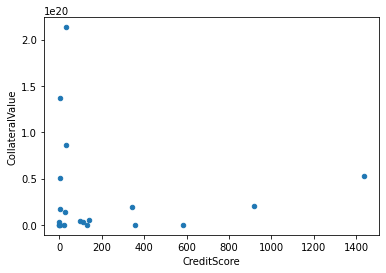

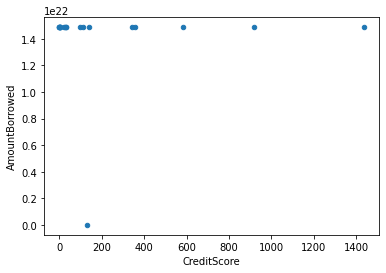

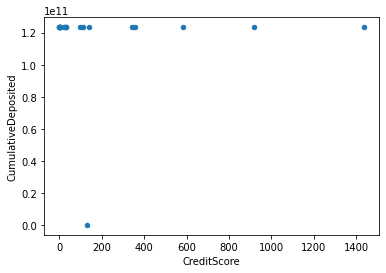

In [ ]:
merge.plot(x='CreditScore', y='CollateralValue', kind='scatter')
merge.plot(x='CreditScore', y='AmountBorrowed', kind='scatter')
merge.plot(x='CreditScore', y='CumulativeDeposited', kind='scatter')

In [ ]:
def drop(data, feat):
    """
    drop feature from data
    """
    new_data = data.drop(feat, axis=1)
    print('Dropping {}...'.format(feat))
    return new_data

In [ ]:
clean_data = merge

In [ ]:
X = drop(clean_data, 'CreditScore')
y = clean_data['CreditScore']

Dropping CreditScore...


In [ ]:
clean_data

,CreditScore,AmountDeposited,AmountBorrowed,ValueOfTokensInUSD,CollateralValue,CumulativeBorrowed,CumulativeDeposited,Eligible
18,131.857816,1.000000e+00,1,1.0,1,1,1,1
0,344.050044,3.216169e+15,14864209463879565633782,4.0,19599621944392388904,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True
1,2.695396,3.216169e+15,14864209463879565633782,4.0,51140319246245057938,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True
2,0.000771,3.216169e+15,14864209463879565633782,4.0,400649233291476096,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True
3,0.038014,3.216169e+15,14864209463879565633782,4.0,114574557051863,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True
4,582.512025,3.216169e+15,14864209463879565633782,4.0,5650471329955230,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True
5,31.906218,3.216169e+15,14864209463879565633782,4.0,86585807581935131840,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True
6,96.945942,3.216169e+15,14864209463879565633782,4.0,4742607114461686484,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True
7,24.575043,3.216169e+15,14864209463879565633782,4.0,14410247924789795554,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True
8,0.002700,3.216169e+15,14864209463879565633782,4.0,3652885897344208063,5103749983.519471380106193313115723,123360620113.1491976771070125453266,True


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=135)

In [ ]:
clean_data.dropna()

,CreditScore,AmountDeposited,AmountBorrowed,ValueOfTokensInUSD,CollateralValue,CumulativeBorrowed,CumulativeDeposited,Eligible
0,131.857816,1.000000e+00,1,1.0,1,1,1,1
1,344.050044,1.000000e+00,1,1.0,1,1,1,1
2,2.695396,1.000000e+00,1,1.0,1,1,1,1
3,0.000771,1.000000e+00,1,1.0,1,1,1,1
4,0.038014,1.000000e+00,1,1.0,1,1,1,1
5,582.512025,1.000000e+00,1,1.0,1,1,1,1
6,31.906218,1.000000e+00,1,1.0,1,1,1,1
7,96.945942,1.000000e+00,1,1.0,1,1,1,1
8,24.575043,1.000000e+00,1,1.0,1,1,1,1
9,0.002700,1.000000e+00,1,1.0,1,1,1,1


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def train(model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_train, y_train_pred)
    r2 = r2_score(y_train, y_train_pred)
    print('For training data, mean squared error: {:.4f}, R2: {:.4f}'.format(mse, r2))

    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print('For test data, mean squared error: {:.4f}, R2: {:.4f}'.format(mse, r2))

In [ ]:
#Scale the Data
#Min Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Split the Data
X= clean_data.copy().drop('CreditScore', axis =1 )
y = clean_data['CreditScore'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
from sklearn.metrics import r2_score
regr = GradientBoostingRegressor(n_estimators=75, learning_rate=0.31, max_depth=4, subsample=1.0,
                                 random_state=42)
regr.fit(X_train, y_train)
print(r2_score(y_test, regr.predict(X_test)))

-44589.33132775552


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Initalize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on training data
model.fit(X_train, y_train)
        
# Predict results
y_test_preds = model.predict(X_test) 

# Evaluate the result
rsquared_score = r2_score(y_test, y_test_preds)
print('R sequared = ', rsquared_score)

R sequared =  -46370.414089704485


In [ ]:
# create a function for evaluate a model with prediction time 

from sklearn.metrics import mean_squared_error, r2_score
from time import time

def train_predict(learner, X_train, y_train, X_test, y_test): 
    """
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: review_scores_rating training set
       - X_test: features testing set
       - y_test: review_scores_rating testing set
    """
    results = {}
    
    #Fit the learner to the training data a
    learner = learner.fit(X_train, y_train)
    
    
    # Get predictions on the test set(X_test), 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    
    #Compute score on the training samples
    results['mse_train'] = mean_squared_error(y_train, predictions_train)
    results['r2_train'] = r2_score(y_train, predictions_train)
    
    #Compute accuracy on test set
    results['mse_test'] = mean_squared_error(y_test,predictions_test)
    results['r2_test'] = r2_score(y_test,predictions_test)
    
    print("MSE_train: %.4f" % results['mse_train'])
    print("MSE_test: %.4f" % results['mse_test'])
    print("R2_train:%.4f" % learner.score(X_train,y_train))
    print("R2_test:%.4f" % learner.score(X_test,y_test))
    return results

In [ ]:
#Initialize two different models

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso 

#clf1 = KNeighborsRegressor()
clf2 = RandomForestRegressor(random_state = 42)
clf3 = Lasso(random_state = 2 )
clf4 = AdaBoostRegressor(random_state =42)


# Collect results on the learners
results = {}
for clf in [ clf2, clf3, clf4]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = train_predict(clf,  X_train, y_train, X_test, y_test)
    

MSE_train: 86890.8911
MSE_test: 22199.9748
R2_train:0.1633
R2_test:-46370.4141
MSE_train: 86847.5051
MSE_test: 20847.5599
R2_train:0.1638
R2_test:-43545.4833
MSE_train: 99331.7687
MSE_test: 50780.1429
R2_train:0.0435
R2_test:-106068.8065


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.216e+06, tolerance: 2.908e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
# Visualize the the result from four different models

def evaluate(results):
    """
    Visualization code to display results of various learners.
    inputs:
        results: a dictionary of individual learners, each learner is a dictionary of different metric  
    """
    # Create figure
    fig, ax = plt.subplots(2, 2, figsize = (12,7))
    fig.tight_layout()

    learners = results.keys()
    mdict = {'RandomForestRegressor': 'RF', 'KNeighborsRegressor':'KNN', 'Lasso': 'Lasso', 'AdaBoostRegressor': "Ada"}
    learners = [mdict[key] for key in learners]
     
    #  loop to plot four panels of data
    for j, metric in enumerate([ 'mse_train', 'r2_train', 'mse_test', 'r2_test']):
        y = []
        for  k, learner in enumerate(results.keys()):
            y.append( results[learner][metric])
            
        ax[j//2, j%2].bar(learners, y,   align='center', alpha=0.5)
        ax[j//2, j%2].set_title(metric)
        
    plt.show()
    

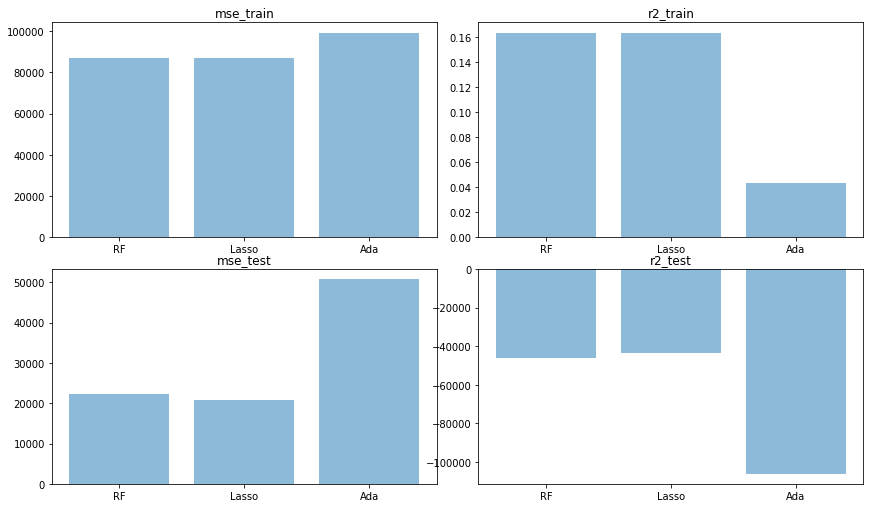

In [ ]:
evaluate(results)

In [ ]:
print(results['AdaBoostRegressor'])
print(results['RandomForestRegressor'])
print(results['Lasso'])

{'mse_train': 99331.76865103251, 'r2_train': 0.04354574686909829, 'mse_test': 50780.14292793248, 'r2_test': -106068.80654255603}
{'mse_train': 86890.89105230643, 'r2_train': 0.1633375360779059, 'mse_test': 22199.974827905367, 'r2_test': -46370.414089704485}
{'mse_train': 86847.50509613901, 'r2_train': 0.16375529449362758, 'mse_test': 20847.55989902718, 'r2_test': -43545.48328801376}


In [ ]:
# Implementation: Model Tuning for Random Forest Regressor 
# we don't need to use scale data since Random Forest learner doesn't require the data to be normalized 
from sklearn.model_selection import GridSearchCV 
clf = RandomForestRegressor(random_state = 42 )

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.

parameters = {'max_depth': [None,5, 8, 10, 12,15, 20] ,'max_leaf_nodes' :[None, 2, 5, 10, 15],
              'min_samples_leaf': [1, 2,  5, 10] }

grid = GridSearchCV(clf, param_grid = parameters, cv = 10)
grid.fit(X_train, y_train)
grid.best_estimator_
grid.best_params_
grid.best_score_ 

# The optimized and model
best_clf = grid.best_estimator_

# Make predictions using the optimized and model
best_predictions = best_clf.predict(X_test)

# Make predictions using the unoptimized and model
predictions = clf.fit(X_train, y_train).predict(X_test)

In [ ]:
# Report the before-and-afterscores

print("Unoptimized model\n------")
print("MSE on testing data: {:.4f}".format(mean_squared_error(y_test, predictions)))
print("R2 on testing data: {:.4f}".format(r2_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final MSE on the testing data: {:.4f}".format(mean_squared_error(y_test, best_predictions)))
print("Final R2 on the testing data: {:.4f}".format(r2_score(y_test, best_predictions)))

Unoptimized model
------
MSE on testing data: 22199.9748
R2 on testing data: -46370.4141

Optimized Model
------
Final MSE on the testing data: 22079.2783
Final R2 on the testing data: -46118.3026


In [ ]:
print(grid.best_params_)
print(best_clf)

{'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5}
RandomForestRegressor(min_samples_leaf=5, random_state=42)


In [ ]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)